In [1]:
import cv2
import glob
import pandas as pd
import numpy as np
from imputation import Imputation
from geotiff import GeoTiff as gt


Bad key text.latex.preview in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/user/anaconda3/envs/datasc3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

In [7]:
import helpers

corr_folder = [file for file in glob.glob("./bad/*")]
corr = []
for file_name in corr_folder:
    image = cv2.imread(file_name)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # with io.open(file_name, 'rb') as image_file:
    #     content = image_file.read()
    corr.append(img)


orig_folder = [file for file in glob.glob("./good/*")]
orig = []
for file_name in corr_folder:
    image = cv2.imread(file_name)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # with io.open(file_name, 'rb') as image_file:
    #     content = image_file.read()
    orig.append(img)

corr = np.array(corr)
orig = np.array(orig)
cmt_arr = []
cp_arr = []


In [8]:
for i in range(len(corr)):
    imp = Imputation(np.array(corr[i]))
    imp.generate_mask()
    imp.impute(speed="fast",skip_vis=1)
    cmt_arr.append(helpers.MSE(imp.cmtf,orig[i]))
    cp_arr.append(helpers.MSE(imp.cpals,orig[i]))


HaLRTC:

SiLRTC:

CMTF:


In [6]:
#RESULTS
print(cmt_arr)
print(cp_arr)

[1116.4730180349188, 914.3292623557446, 1094.8045487665825, 988.7471871009293, 942.8642532199426]
[1070.5610678518065, 879.1103457473356, 1160.779479487814, 976.3677585827995, 951.0036803293666]


In [2]:
# df = pd.read_csv('../MISC/test.tsv', sep='\t', header=None)
# imp = Imputation(df)

In [14]:
# tifread = gt('./images/fine_t0_clipped.tif')
# img = np.array(tifread.read())
# imp = Imputation(img)

In [2]:
# [IMP] need to use this function to set
# the brightness for interactive parts/visualization
# imp.set_brightness(0.0006) # 1 1000 100 0.1
# imp.show_img(imp.img)

In [16]:
# MASK: 1 for valid pixel, 0 for missing pixels

# imp.generate_mask(threshold): this threshold value translates to the 
# minimum difference between neighboring pixels which would cause one of them
# to be identified as corrupt pixels. Leaving it blank will generate & print
# an auto threshold which will be the average of all the values.
# [IMP: This thresholding value depends entirely on the dataframe]


imp.generate_mask() # 1. to find a mask for an image with missing pixels

# imp.generate_mask(approximate_mask=True) # 2. to find an approximate mask for an image with missing pixels

# imp.synthetic_mask() # 3. to randomly delete pixels

# 'r' to reset, 'enter' to continue after drawing mask, 'o/p' to decrease/increase size of cursor
# imp.draw_mask() # 4. Draw a mask. LClick: freehand drawing, RClick: draw a rect

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [19]:
# hil = 0->no HiL, 1->run HiL, 2->run ONLY HiL
imp.impute(speed="fast", hil=2) # hiL is for CMTF4SI

Imputation val =  1269.2931919642858
HaLRTC:

SiLRTC:

CMTF:


cp_als:

CP_ALS:


Base RSE: 0.2803169737757259
HaLRTC RSE: 0.2803169737757259
SiLRTC RSE: 0.2803169737757259
CMTF RSE: 0.2671886345573008
CMSI RSE: 0.2658784262001085
CP-ALS RSE: 0.27593565276098164
HaLRTC runtime: 0.0026514530181884766
SiLRTC runtime: 0.0015091896057128906
CMTF runtime: 0.13435816764831543
CMTF4SI runtime: 9.352221250534058
CP-ALS runtime: 0.03755950927734375
Imputation completed successfully!


In [10]:
test = imp.get_best_np() # np array of the best imputed image

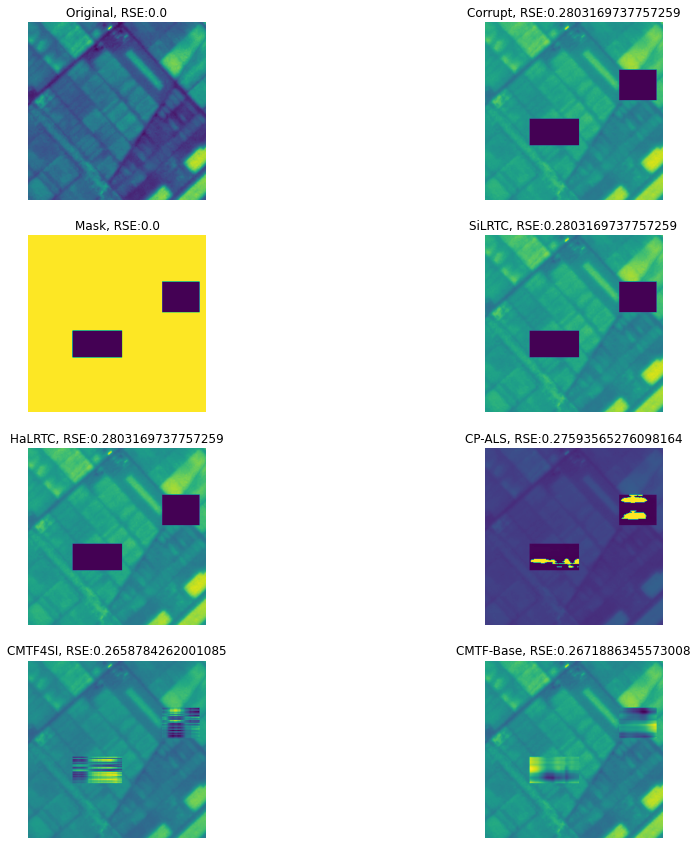

In [20]:
# NOTE: Please consider RSE values only when the original image is NOT corupt.
# Otherwise those values are meaningless.
imp.visualize() 